# Ch10. 금융의 합성 데이터 생성과 은닉 마르코프 모델

- 합성 데이터: 실제 데이터로 작업하는 대신 필수 통계 속성을 모방할 수 있 -> 모델에 합성 데이터 제공 좋음
- 은닉 마르코프 모델(HMM)으로 합성 데이터 생성 가능

(\*) 합성 데이터 생성
- 합성 데이터: 실제 데이터의 통계적 속성을 모방하는 과정에서 생성된 데이터
- 생성 방법:
1. 실제 데이터에서 합성 데이터 생성 가능: 실제 데이터에서 시작 ~ 모델링 계속 ~ 기존 모델에서 합성 데이터 샘플링
2. 모델 or 지식에서 얻을 수 있음: 기존 모델 사용 or 연구원의 지식 사용해 적용
3. 하이브리드 프로세스: 앞의 두 단계 포함
- 합성 데이터 생성 프로세스: 프라이버시 & 효용 사이에 타협되지 않는 절충점 있음

(\*) 합성 데이터 평가: KL-분산, 구별 가능 ROC 곡선 및 평균, 중앙값 등과 같은 주요 통계 비교
1. 구별 가능 기법: 분류 모델이 실제 데이터와 합성 데이터를 구분하는 경우 실제 데이터에 1 할당, o/w 0 할당
- 출력이 1에 가까우면 데이터는 실제라고 예측
- o/w 성향 점수 사용해 합성 데이터라고 예측
2. 실제 데이터와 합성 데이터의 주요 통계량 비교 ~ 합성 데이터가 실제 데이터를 모방하는 정도 파악 가능

(\*) 합성 데이터 생성의 장단점:
- 장점:
1. 데이터 가용성 향상
2. 향상된 분석 능력
3. 일반 적인 통계 문제 처리: 결측값, 이상값 등 無 ~ 모델링 성능 향상 가능
- 단점:
1. 기밀성 유지 불가: 개인 정보 유출의 원인이 될 수 있음
2. 품질 문제: 연구자의 능력 + 데이터의 특성

In [ ]:
# CTGAN: 생성적 적대 네트워크(GAN) 기반으로 원본 데이터에 대한 충실도 높은 합성 데이터 생성 가능
# 합성 데이터 생성 훈련 단계 수: epoch 매개변수에 의해 제어됨
from sklearn.datasets import fetch_california_housing # 데이터 가져오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
X, y=fetch_california_housing(return_X_y=True) # 독립 및 종속 변수 생성

In [3]:
california_housing=np.column_stack([X,y]) # 두 개의 배열 쌓기
california_housing_df=pd.DataFrame(california_housing)

In [4]:
!pip install ctgan

   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 2.0/2.0 MB 13.1 MB/s  0:00:00

   ---------------------------------------- 0/3 [Faker]
   ---------------------------------------- 0/3 [Faker]
   ---------------------------------------- 0/3 [Faker]
   ---------------------------------------- 0/3 [Faker]
   ---------------------------------------- 0/3 [Faker]
   ---------------------------------------- 0/3 [Faker]
   ---------------------------------------- 0/3 [Faker]
   ---------------------------------------- 0/3 [Faker]
   ---------------------------------------- 0/3 [Faker]
   ---------------------------------------- 0/3 [Faker]
   ---------------------------------------- 0/3 [Faker]
   ---------------------------------------- 0/3 [Faker]
   ---------------------------------------- 0/3 [Faker]
   ---------------------------------------- 0/3 [Faker]
   ---------------------------------------- 0/3 [Faker]
   -------------

In [16]:
!pip install ctgan

  Using cached ctgan-0.12.0-py3-none-any.whl.metadata (10 kB)
Using cached ctgan-0.12.0-py3-none-any.whl (25 kB)


In [17]:
import ctgan
import inspect

print(f"설치 경로: {ctgan.__file__}")
# ctgan 모듈 내부에 무엇이 있는지 확인
print(f"모듈 내부 리스트: {dir(ctgan)}")

설치 경로: c:\Users\82103\anaconda3\Lib\site-packages\ctgan\__init__.py
모듈 내부 리스트: ['CTGAN', 'TVAE', '__all__', '__author__', '__builtins__', '__cached__', '__doc__', '__email__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'data_sampler', 'data_transformer', 'demo', 'errors', 'load_demo', 'synthesizers']


In [19]:
from ctgan import CTGAN # 합성 데이터 생성 위한 라이브러리

california_housing_df.columns = california_housing_df.columns.astype(str)
ctgan_=CTGAN(epochs=10) 
ctgan_.fit(california_housing_df)
synt_sample=ctgan_.sample(len(california_housing_df))

Exception in thread Thread-167 (_readerthread):
Traceback (most recent call last):
  File "c:\Users\82103\anaconda3\Lib\threading.py", line 1043, in _bootstrap_inner
    self.run()
    ~~~~~~~~^^
  File "c:\Users\82103\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 772, in run_closure
    _threading_Thread_run(self)
    ~~~~~~~~~~~~~~~~~~~~~^^^^^^
  File "c:\Users\82103\anaconda3\Lib\threading.py", line 994, in run
    self._target(*self._args, **self._kwargs)
    ~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\82103\anaconda3\Lib\subprocess.py", line 1615, in _readerthread
    buffer.append(fh.read())
                  ~~~~~~~^^
  File "<frozen codecs>", line 325, in decode
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc0 in position 4: invalid start byte


In [20]:
california_housing_df.describe()

,0,1,2,3,4,5,6,7,8
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [21]:
synt_sample.describe()

,0,1,2,3,4,5,6,7,8
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.127425,30.861811,5.684562,1.296534,1343.083138,2.430269,35.314440,-119.557644,2.552869
std,1.715627,14.591167,1.738680,0.348088,1044.871624,0.917368,2.250170,1.858192,1.221771
min,-0.154814,-3.429940,-0.032651,0.183641,-895.649276,0.256404,32.107202,-125.704697,0.170872
25%,1.814144,19.448900,4.661735,1.122278,734.052187,1.716395,33.635184,-121.244087,1.616208
50%,3.041659,30.671180,5.555097,1.206379,1149.129749,2.353741,34.224396,-119.439049,2.223186
75%,4.093218,42.523783,6.440688,1.321840,1618.573195,3.068312,37.456245,-117.981324,3.531793
max,12.737832,57.086092,35.795360,5.002556,11990.690197,7.131968,43.222112,-113.396758,5.583517


In [22]:
!pip install sdv

   ---------------------------------------- 0.0/14.6 MB ? eta -:--:--
   ----------------- ---------------------- 6.3/14.6 MB 31.0 MB/s eta 0:00:01
   ---------------------------------------  14.4/14.6 MB 35.1 MB/s eta 0:00:01
   ---------------------------------------- 14.6/14.6 MB 30.2 MB/s  0:00:00

   ---------------------------------------- 0/8 [graphviz]
  Attempting uninstall: botocore
   ---------------------------------------- 0/8 [graphviz]
    Found existing installation: botocore 1.40.46
   ---------------------------------------- 0/8 [graphviz]
   ----- ---------------------------------- 1/8 [botocore]
   ----- ---------------------------------- 1/8 [botocore]
   ----- ---------------------------------- 1/8 [botocore]
   ----- ---------------------------------- 1/8 [botocore]
   ----- ---------------------------------- 1/8 [botocore]
   ----- ---------------------------------- 1/8 [botocore]
    Uninstalling botocore-1.40.46:
   ----- ---------------------------------- 1/8

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.25.0 requires botocore<1.40.50,>=1.40.46, but you have botocore 1.42.43 which is incompatible.


In [ ]:
# 모델 기반 합성 데이터 생성 프로세스
# 1. 회귀 모델 실행 위한 합성 데이터 생성에 유용
from sklearn.datasets import make_regression 
from matplotlib import cm

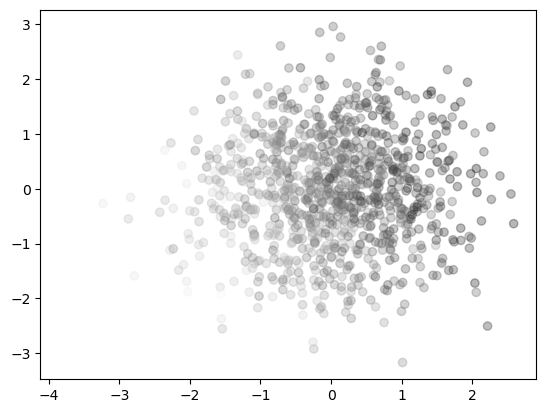

In [29]:
X, y=make_regression(n_samples=1000, n_features=3, noise=0.2, random_state=123) # 회귀 위한 합성 데이터 생성
plt.scatter(X[:,0], X[:,1], alpha=0.3, cmap='Greys', c=y)

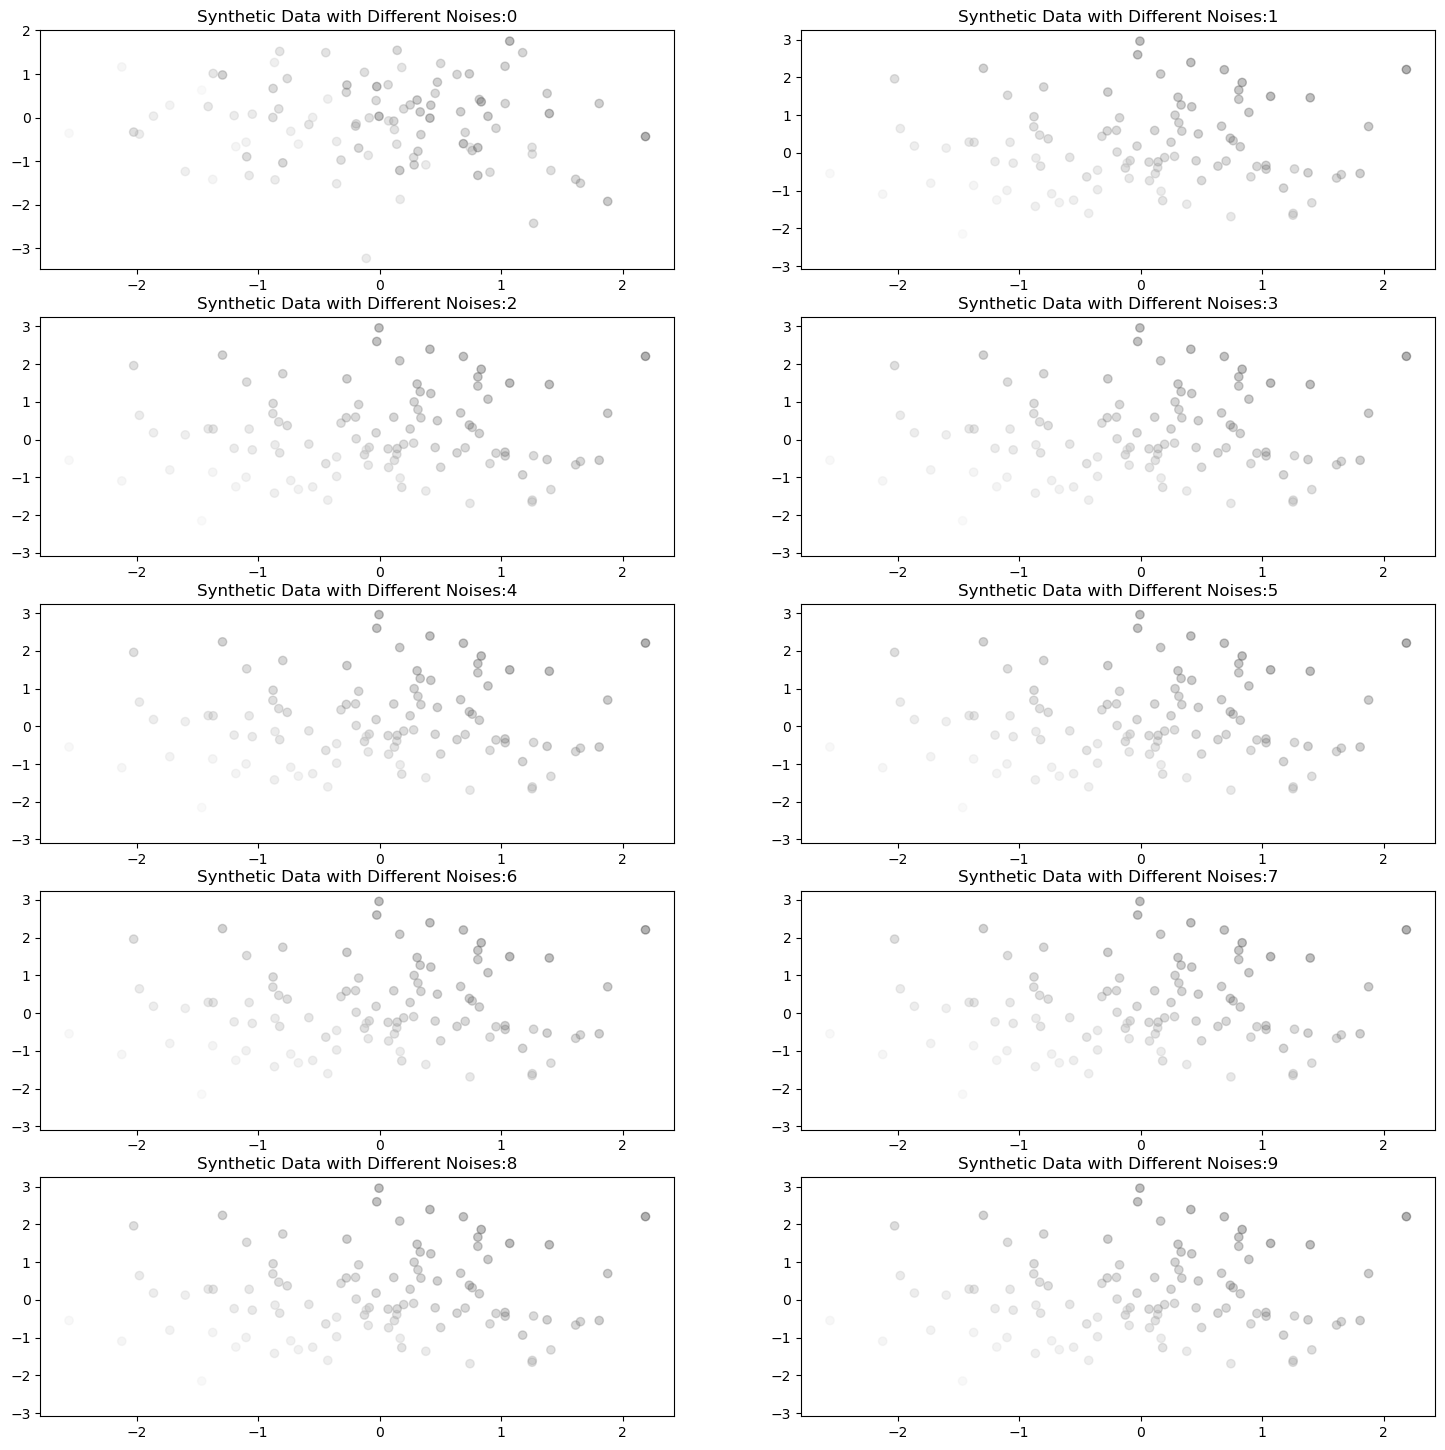

In [30]:
plt.figure(figsize=(18,18))
k=0
for i in range(0,10):
    X,y=make_regression(n_samples=100, n_features=3, noise=i, random_state=123)
    k+=1
    plt.subplot(5,2,k)
    profit_margin_orange=np.asarray([20,35,40])
    plt.scatter(X[:,0], X[:,1], alpha=0.3, cmap=cm.Greys, c=y)
    plt.title('Synthetic Data with Different Noises:'+str(i))
plt.show()

=> 다양한 잡음이 합성 데이터에 미치는 영향

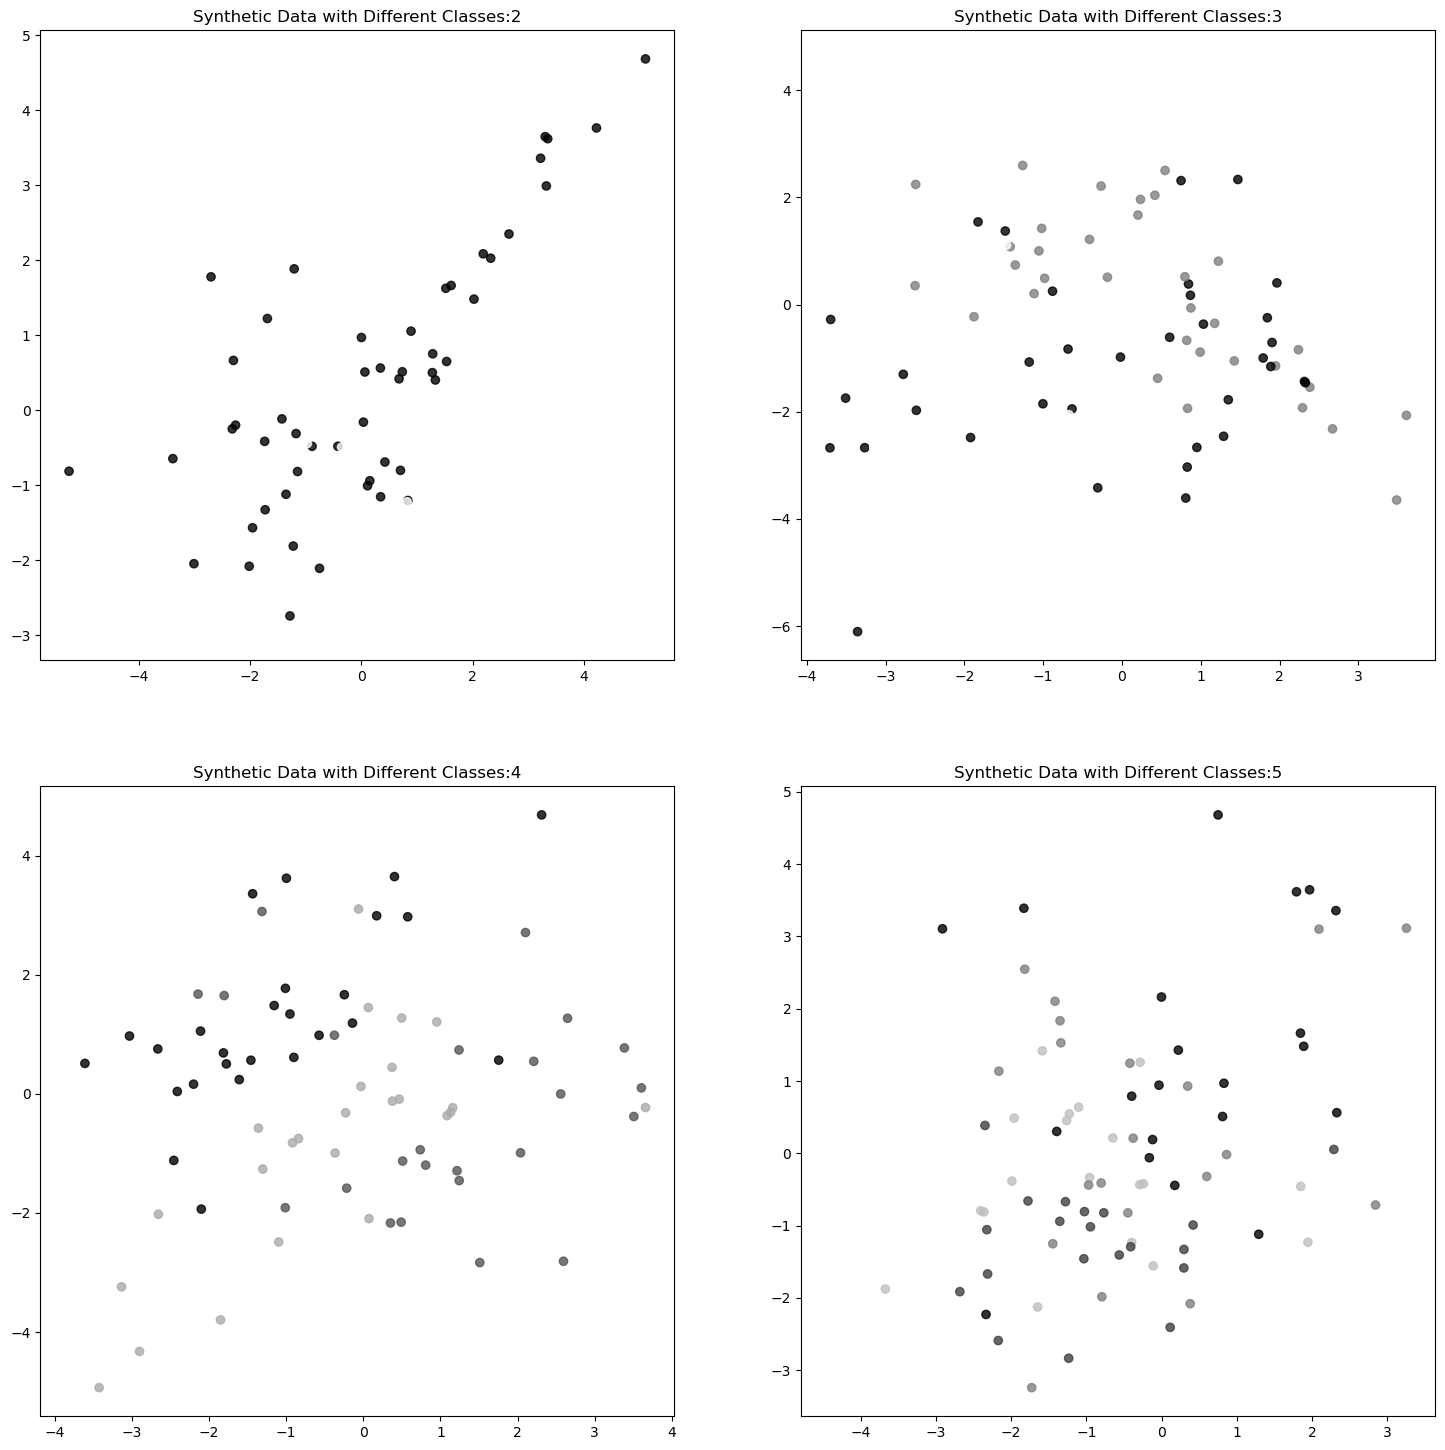

In [32]:
# 2. 분류 위한 합성 데이터 생성 
from sklearn.datasets import make_classification
plt.figure(figsize=(18,18))
k=0

for i in range(2,6):
    X,y=make_classification(n_samples=100, n_features=4, n_classes=i, n_redundant=0, n_informative=4, random_state=123)
    k+=1
    plt.subplot(2,2,k)
    plt.scatter(X[:,0], X[:,1], alpha=0.8, cmap='gray', c=y)
    plt.title('Synthetic Data with Different Classes:'+str(i))
plt.show()

=> 서로 다른 부류의 효과

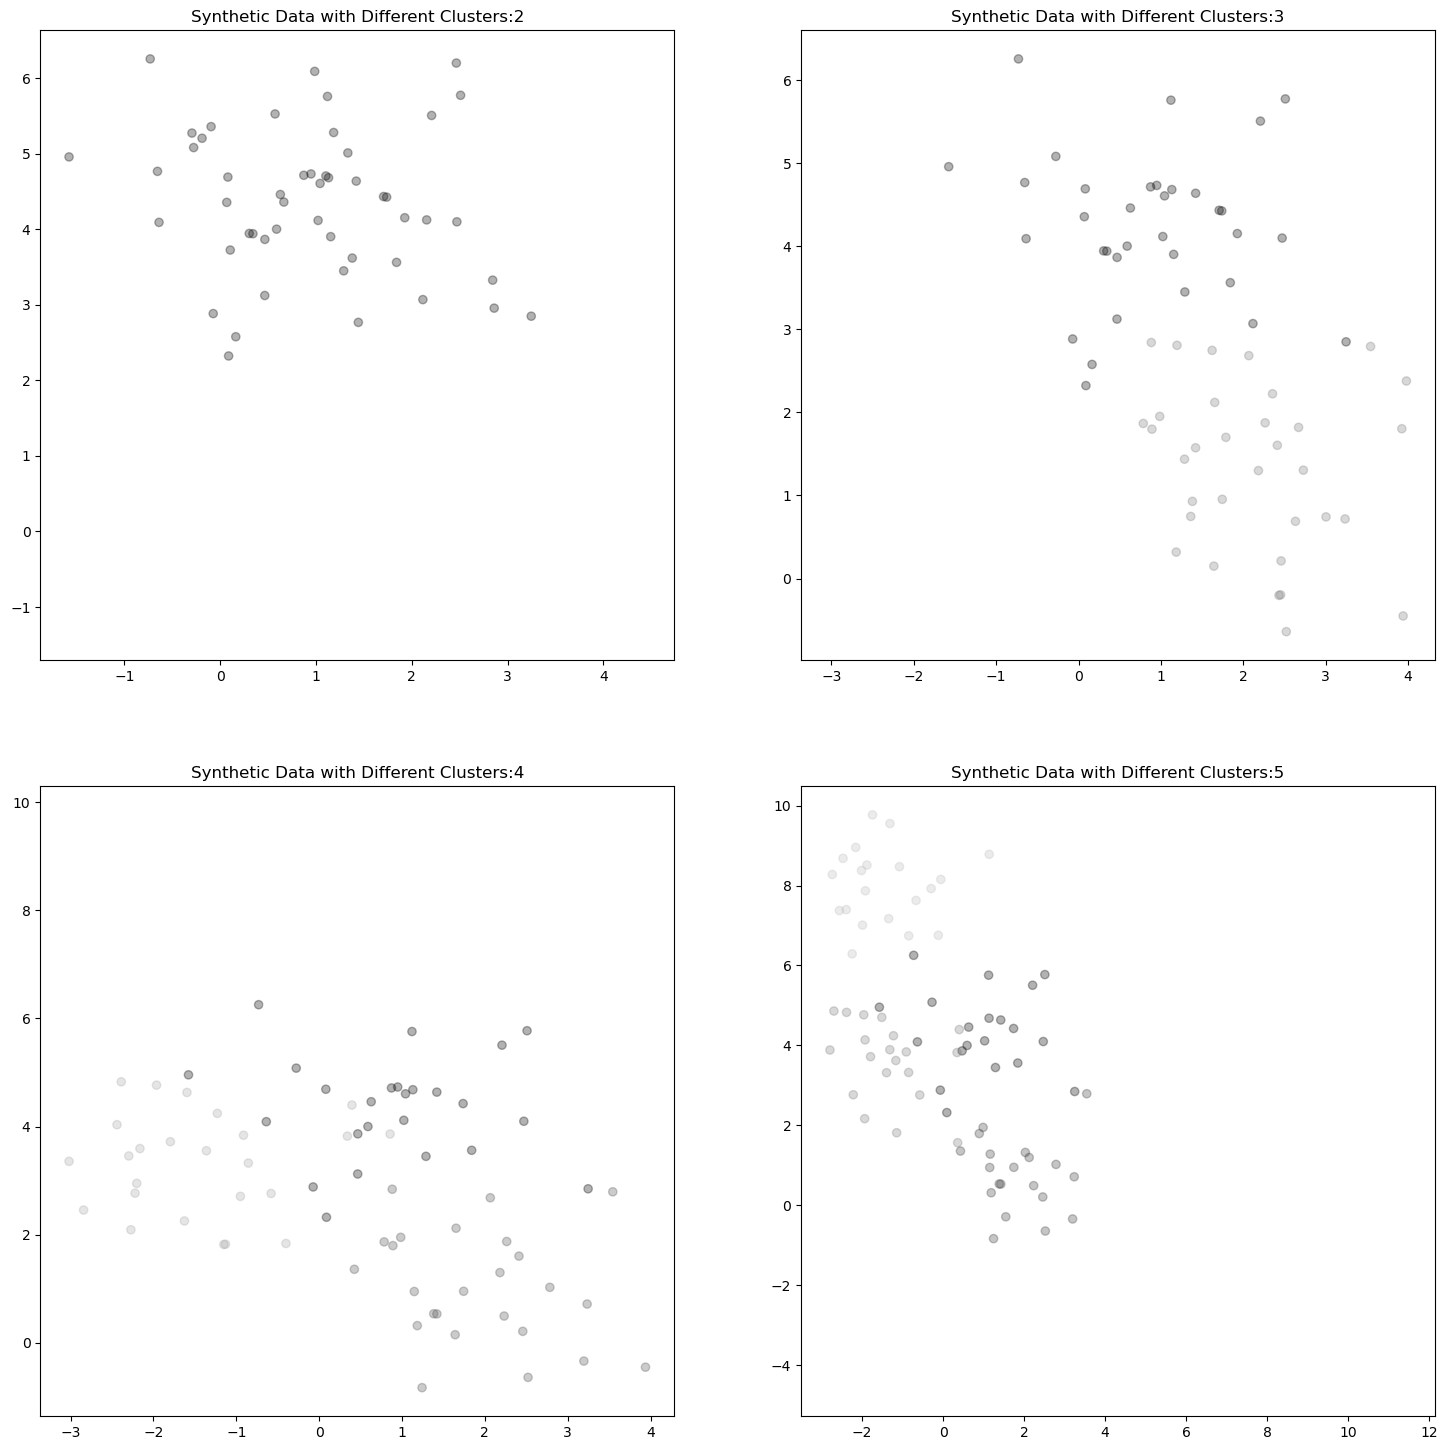

In [33]:
# 3, 비지도 학습으로 생성
from sklearn.datasets import make_blobs 
X,y=make_blobs(n_samples=100, centers=2, n_features=2, random_state=0) # 두 개의 중심

plt.figure(figsize=(18,18))
k=0
for i in range(2,6):
    X,y=make_blobs(n_samples=100, centers=i, n_features=2, random_state=0)
    k+=1
    plt.subplot(2,2,k)
    my_scatter_plot=plt.scatter(X[:,0],X[:,1],alpha=0.3, cmap='grey', c=y)
    plt.title('Synthetic Data with Different Clusters:'+str(i))
plt.show()

(\*) 은닉 마르코프 모델
- HMM: 은닉 상태가 있는 마르코프 프로세스에 의해 모델링된 순차적 데이터에 대한 확률 분포 제공 
- HMM 사용하면 한 상태에서 다른 상태로의 확률 전이 추정 가능
- 다음 상태가 무엇일지 모름 -> 은닉 상태로 간주
- 두 가지 가정: 
1. 모든 관찰은 현재 상태에만 의존 & 다른 변수에는 조건부로 독립적
2. 전환 확률: 동질적, 현재의 은닉 상태에만 종속

(\*) 파마-프렌치 3요소 모델과 HMM 비교
1. 파마-프렌치:
- CAPM 확장
- 시장 위험($R_m-R_f$), 소형-대형(SMB), 고평가-저평가(HML)
- SMB: 소형주와 대형주 사이의 수익률 계산해 규모 효과 고려
- HML: 기업 장부가치, 시장 가치 비교 -> 높/낮 기업 간의 수익률 스프레드

In [34]:
ff=pd.read_csv('FF3.csv', skiprows=4)
ff=ff.rename(columns={'Unnamed: 0':'Date'})
ff=ff.iloc[:-1]
ff.head()

,Date,Mkt-RF,SMB,HML,RF
0,19260701,0.10,-0.24,-0.28,0.009
1,19260702,0.45,-0.32,-0.08,0.009
2,19260706,0.17,0.27,-0.35,0.009
3,19260707,0.09,-0.59,0.03,0.009
4,19260708,0.21,-0.36,0.15,0.009


In [35]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24978 entries, 0 to 24977
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    24978 non-null  object 
 1   Mkt-RF  24978 non-null  float64
 2   SMB     24978 non-null  float64
 3   HML     24978 non-null  float64
 4   RF      24978 non-null  float64
dtypes: float64(4), object(1)
memory usage: 975.8+ KB


In [36]:
ff['Date']=pd.to_datetime(ff['Date'])
ff.set_index('Date',inplace=True)
ff_trim=ff.loc['2000-01-01':]
ff_trim.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
2000-01-03,-0.71,0.61,-1.40,0.021
2000-01-04,-4.06,0.01,2.06,0.021
2000-01-05,-0.09,0.18,0.19,0.021
2000-01-06,-0.73,-0.42,1.27,0.021
2000-01-07,3.21,-0.49,-1.42,0.021


=> 주식 수익률의 역학을 설명하는 변수

In [37]:
# SPDR S&P 500 ETF(SPY) 일일 종가
ticker='SPY'
start=datetime.datetime(2000,1,3)
end=datetime.datetime(2021, 4, 30)
SP_ETF=yf.download(ticker, start,end, interval='1d').Close

[*********************100%***********************]  1 of 1 completed


In [38]:
ff_merge=pd.merge(ff_trim,SP_ETF,how='inner',on='Date')

In [40]:
SP=pd.DataFrame()
SP['Close']=ff_merge['SPY']
SP['return']=(SP['Close']/SP['Close'].shift(1))-1 # 수익률 계산

In [41]:
!pip install hmmlearn

In [42]:
# 경제에는 상승, 하락, 유지 세 가지 상태 있음 -> HMM 실행
# 가우스 HMMM 적용 & 은닉 상태 예측 방법
from hmmlearn import hmm
hmm_model=hmm.GaussianHMM(n_components=3, covariance_type='full',n_iter=100) # 완전 공분산
hmm_model.fit(np.array(SP['return'].dropna()).reshape(-1,1))
hmm_predict=hmm_model.predict(np.array(SP['return'].dropna()).reshape(-1,1))
df_hmm=pd.DataFrame(hmm_predict)


In [43]:
ret_merged=pd.concat([df_hmm, SP['return'].dropna().reset_index()],axis=1)
ret_merged.drop('Date', axis=1, inplace=True)
ret_merged.rename(columns={0:'states'}, inplace=True)
ret_merged.dropna().head()

,states,return
0,2,-0.039106
1,2,0.001789
2,2,-0.016071
3,2,0.058076
4,1,0.003430


=> 어떤 수익률이 어떤 상태에 속하는지

In [44]:
ret_merged['states'].value_counts()

states
0    3040
1    2091
2     233
Name: count, dtype: int64

In [47]:
state_means=[]
state_std=[]
for i in range(3):
    state_means.append(ret_merged[ret_merged.states==i]['return'].mean())
    state_std.append(ret_merged[ret_merged.states==i]['return'].std())
print('State Means are: {}'.format(state_means))
print('State Standard Deviations are: {}'.format(state_std))

State Means are: [np.float64(0.0010729323915465289), np.float64(-0.00047336799863206694), np.float64(-0.0016991699014788446)]
State Standard Deviations are: [0.006077185587931635, 0.013748635824195773, 0.037442557295048744]


Text(0, 0.5, 'Log Likelihood')

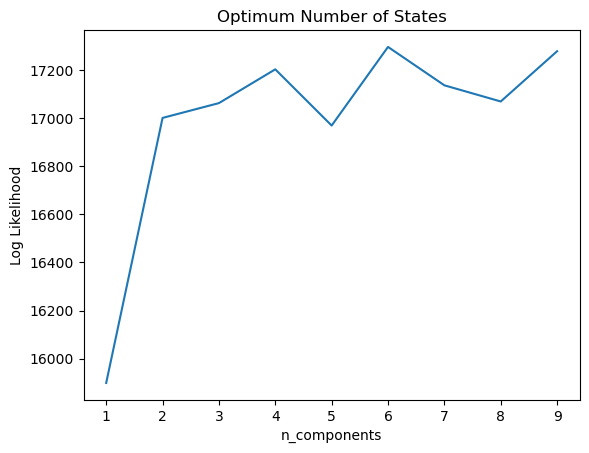

In [49]:
# 엘보우 분석 -> 시장에 상태 몇 개? 우도 값이 상대적으로 정체되는 경우 분석 중단
sp_ret=SP['return'].dropna().values.reshape(-1,1)
n_components=np.arange(1,10)
clusters=[hmm.GaussianHMM(n_components= n, covariance_type='full').fit(sp_ret) for n in n_components]
plt.plot(n_components, [m.score(np.array(SP['return'].dropna()).reshape(-1,1)) for m in clusters])
plt.title('Optimum Number of States')
plt.xlabel('n_components')
plt.ylabel('Log Likelihood')

In [ ]:
hmm_model=hmm.GaussianHMM(n_components=3, covariance_type='full', random_state=123).fit(sp_ret)
hidden_states=hmm_model.predict(sp_ret)

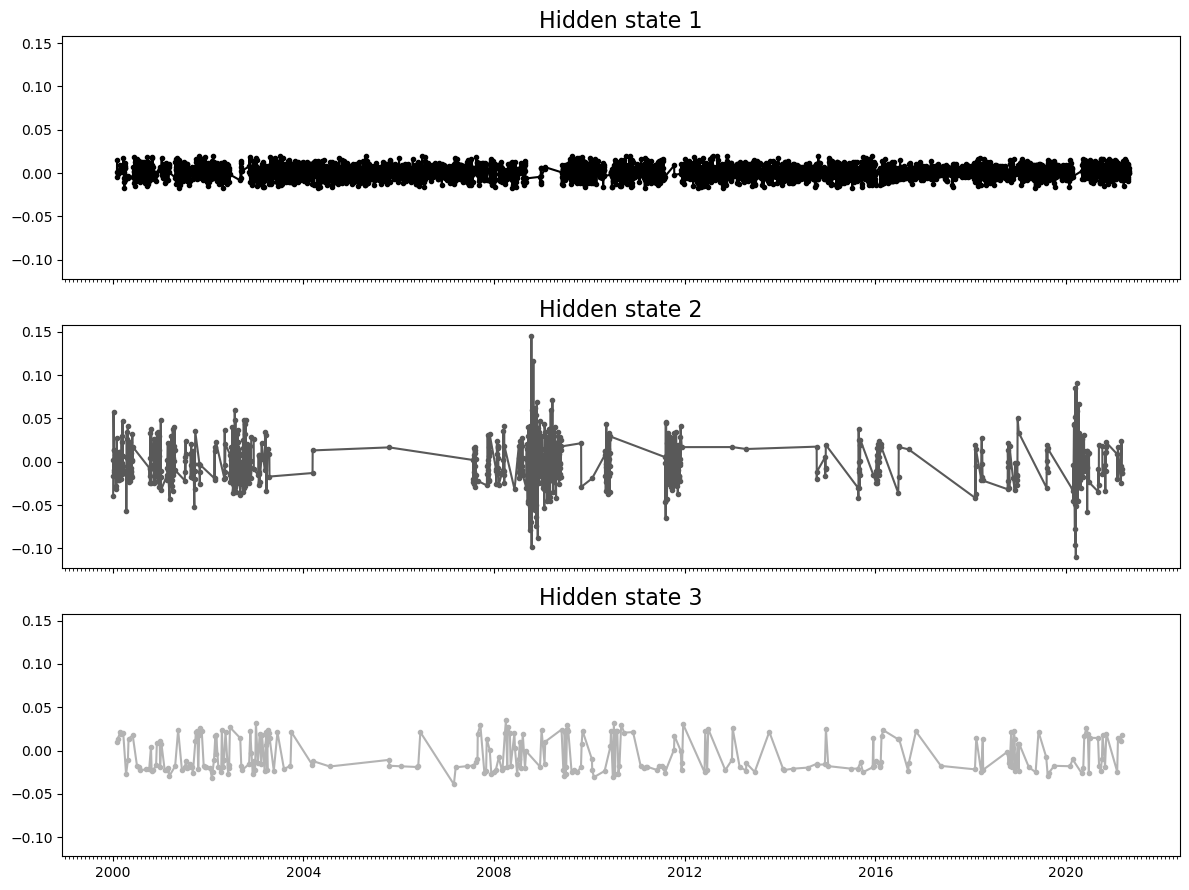

In [51]:
from matplotlib.dates import YearLocator, MonthLocator
df_sp_ret=SP['return'].dropna()
hmm_model=hmm.GaussianHMM(n_components=3, covariance_type='full', random_state=123).fit(sp_ret)
hidden_states=hmm_model.predict(sp_ret)

fig, axs=plt.subplots(hmm_model.n_components, sharex=True, sharey=True, figsize=(12,9))
colors=cm.gray(np.linspace(0,0.7,hmm_model.n_components))

for i, (ax, color) in enumerate(zip(axs, colors)):
    mask=hidden_states==i
    ax.plot_date(df_sp_ret.index.values[mask], df_sp_ret.values[mask], '.-', c=color)
    ax.set_title('Hidden state {}'.format(i+1), fontsize=16)
    ax.xaxis.set_minor_locator(MonthLocator())
plt.tight_layout()

=> 은닉 상태의 동작 보여줌 -> 상태 식별 중요성

In [52]:
ret_merged.groupby('states')['return'].mean()

states
0    0.001073
1   -0.000473
2   -0.001699
Name: return, dtype: float64

In [53]:
ff_merge['return']=ff_merge['SPY'].pct_change()
ff_merge.dropna(inplace=True)

In [54]:
split=int(len(ff_merge)*0.9)
train_ff=ff_merge.iloc[:split].dropna()
test_ff=ff_merge.iloc[split:].dropna()

In [55]:
hmm_model=hmm.GaussianHMM(n_components=3, covariance_type='full',n_iter=100, init_params='')

In [64]:
predict=[]
for i in range(len(test_ff)):
    hmm_model.fit(train_ff)
    adjustment=np.dot(hmm_model.transmat_,hmm_model.means_) # 전이 매트릭스 기반 조정
    predict.append(test_ff.iloc[i]+adjustment[0])
predict=pd.DataFrame(predict)

In [65]:
std_dev=predict['return'].std()
sharpe=predict['return'].mean()/std_dev
print('Sharpe ratio with HMM is {:.4f}'.format(sharpe))

Sharpe ratio with HMM is 0.0874


In [66]:
import statsmodels.api as sm
Y=train_ff['return']
X=train_ff[['Mkt-RF','SMB','HML']]

model=sm.OLS(Y,X)
ff_ols=model.fit()
print(ff_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                 return   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                          4.418e+04
Date:                    금, 06 2 2026   Prob (F-statistic):                        0.00
Time:                        23:02:13   Log-Likelihood:                          22543.
No. Observations:                4827   AIC:                                 -4.508e+04
Df Residuals:                    4824   BIC:                                 -4.506e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [67]:
ff_pred=ff_ols.predict(test_ff[['Mkt-RF','SMB','HML']])
ff_pred.head()

Date
2019-03-14   -0.000340
2019-03-15    0.005168
2019-03-18    0.004284
2019-03-19   -0.000220
2019-03-20   -0.003816
dtype: float64

In [68]:
std_dev=ff_pred.std()
sharpe=ff_pred.mean()/std_dev
print('Sharpe ratio with FF 3 factor model is {:.4f}'.format(sharpe))

Sharpe ratio with FF 3 factor model is 0.0588


=> 가우스 HMM이 더 나은 위험 조정 수익률 제공

In [69]:
# 낯선 데이터 기반으로 지수 수익률 상태 예측해야 하는 경우
split=int(len(SP['return'])*0.8)
train_ret_SP=SP['return'][:split].dropna()
test_ret_SP=SP['return'][split:].dropna()

hmm_model=hmm.GaussianHMM(n_components=3, covariance_type='full',n_iter=100)
hmm_model.fit(np.array(train_ret_SP).reshape(-1,1))
hmm_predict_vol=hmm_model.predict(np.array(test_ret_SP).reshape(-1,1))
pd.DataFrame(hmm_predict_vol).value_counts()

Model is not converging.  Current: 13582.759505534257 is not greater than 13582.76653422984. Delta is -0.007028695583358058


0
1    809
2    243
0     21
Name: count, dtype: int64

(\*) 가우스 HMM 사용한 합성 데이터 생성 프로세스
- 먼저 초기 매개변수 정의해야 함: 초기 확률, 전이 행렬, 평균, 공분산
- 매개변수 정의 후 가우스 HMM 실행해 임의 샘플링 절차 적요

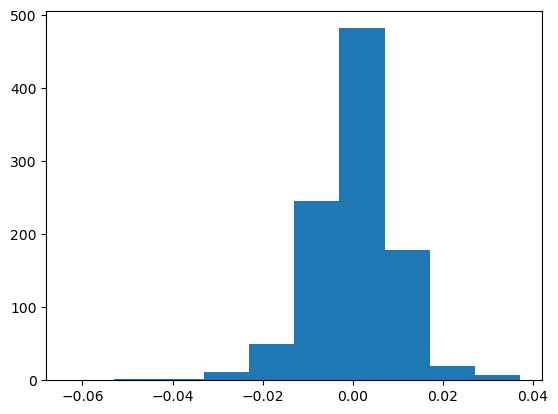

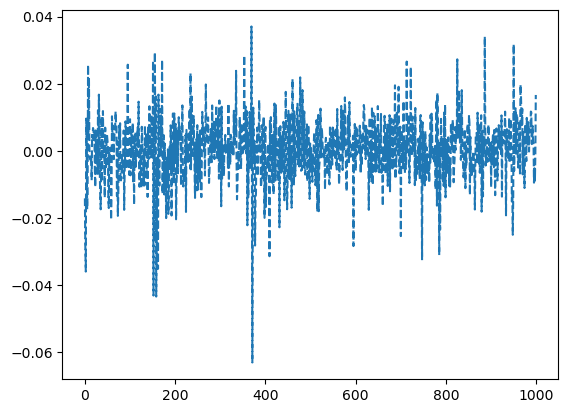

In [70]:
startprob=hmm_model.startprob_
transmat=hmm_model.transmat_
means=hmm_model.means_
covars=hmm_model.covars_

syn_hmm=hmm.GaussianHMM(n_components=3, covariance_type='full')
syn_hmm.startprob_=startprob
syn_hmm.transmat_=transmat
syn_hmm.means_=means
syn_hmm.covars_=covars

syn_data,_=syn_hmm.sample(n_samples=1000)

plt.hist(syn_data)
plt.show()
plt.plot(syn_data,'--')
plt.show()

=> 가우스 HMM에서 충분히 큰 샘플 -> 정규분포 데이터 관찰됨